In [66]:
import utils, umls_tables_processing
import plotly.graph_objects as go
from plotly.subplots import make_subplots

0:24:31


In [104]:
big_g = utils.inputs_load('Utilities/Relatedness Data/relatedness_data__onlypreflab2021-10-08 16:12:17.177422')
ks = list(big_g[embs[0]].keys())
seeds = list(big_g[embs[0]][ks[0]].keys())
seed = seeds[2] # seed_union
k = 5

0:00:01


In [105]:
sorted_dict = {h:v[h][seed][0] for h,v in big_g.items()}
sorted_dict

{'claims_cuis_hs_300.txt': 0.008795584488362373,
 'stanford_cuis_svd_300.txt': 0.0,
 'cui2vec_pretrained': 0.05606164557834863,
 'DeVine_etal_200': 0.051853626495346646,
 'PMC-w2v': 0.062084141851161304,
 'Health_2.5mreviews.s200.w10.n5.v15.cbow': 0.02044794585036349,
 'PubMed-and-PMC-w2v': 0.06463262350750168,
 'GoogleNews-vectors-negative300': 0.03740198441577315,
 'PubMed-w2v': 0.06826353683986577,
 'tweetsvec': 0.02365421426841193,
 'wikipedia-pubmed-and-PMC-w2v': 0.05753062874918527}

In [106]:
sorted_dict_ = {h: v for h, v in sorted(sorted_dict.items(), key=lambda item: item[1])}
embs = list(sorted_dict_.keys())
embs

['stanford_cuis_svd_300.txt',
 'claims_cuis_hs_300.txt',
 'Health_2.5mreviews.s200.w10.n5.v15.cbow',
 'tweetsvec',
 'GoogleNews-vectors-negative300',
 'DeVine_etal_200',
 'cui2vec_pretrained',
 'wikipedia-pubmed-and-PMC-w2v',
 'PMC-w2v',
 'PubMed-and-PMC-w2v',
 'PubMed-w2v']

In [121]:
embs_ = {}
for emb in embs:
    a = emb.replace('-w2v', '')
    b = a.split('_', 1)
    if 'wikipedia' in b[0]:
        b[0] = 'wiki-PubMed-PMC'
    elif 'Google' in b[0]:
        b[0] = 'GoogleNews'
    embs_[emb] = b[0]

# https://developer.mozilla.org/en-US/docs/Web/CSS/color_value
colors = ['lightgreen', 'lightcoral', 'darkslateblue',   'purple']
parallel_colors = ['seagreen', 'darksalmon', 'royalblue', 'mediumpurple']
colors_k = ['darkslateblue', 'aqua', 'deepskyblue', 'aquamarine', 'cadetblue', 'cornflowerblue']

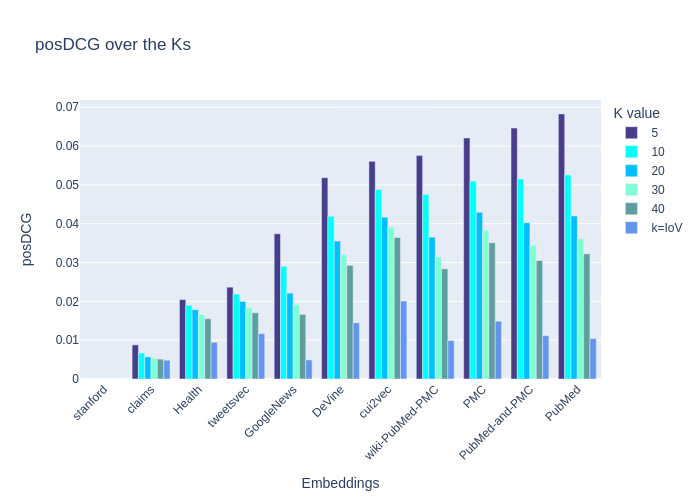

In [122]:
seed = seeds[2]# seed_union
fig = go.Figure()

em = list(embs_.values())
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][5][seed][0] for emb in embs],
    name='5',
    marker_color='darkslateblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][10][seed][0] for emb in embs],
    name='10',
    marker_color= 'aqua'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][20][seed][0] for emb in embs],
    name='20',
    marker_color= 'deepskyblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][30][seed][0] for emb in embs],
    name='30',
    marker_color= 'aquamarine'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb][40][seed][0] for emb in embs],
    name='40',
    marker_color= 'cadetblue'
))
fig.add_trace(go.Bar(
    x=em,
    y=[big_g[emb]['max_k'][seed][0] for emb in embs],
    name='k=IoV',
    marker_color= 'cornflowerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG over the Ks',
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG', 
                  barmode='group',
                  legend_title = 'K value',
                  xaxis_tickangle=-45)
#fig.write_image("fig1.png")
fig.show(renderer="png")

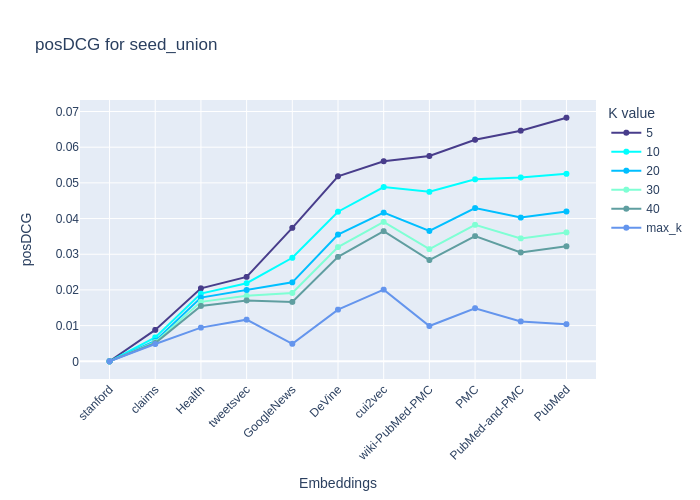

In [123]:
fig = go.Figure()

for i, t in enumerate(ks):
    fig.add_trace(go.Scatter(
        x=em,
        y=[big_g[emb][t][seed][0] for emb in embs],
        name=t,
        marker_color=colors_k[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG for ' + seed ,
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG', 
                  barmode='group',
                  legend_title = 'K value',
                  xaxis_tickangle=-45)
fig.show(renderer="png")

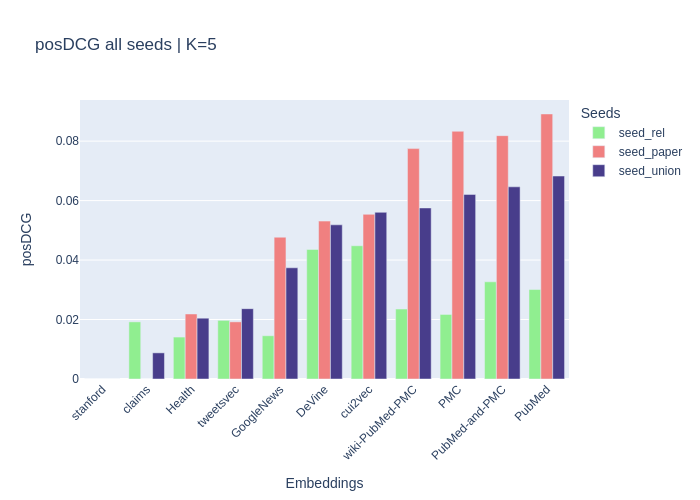

In [112]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Bar(
        x=em,
        y=[big_g[emb][k][seed][0] for emb in embs],
        name= seed,
        marker_color=colors[i]
        ))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='posDCG',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")

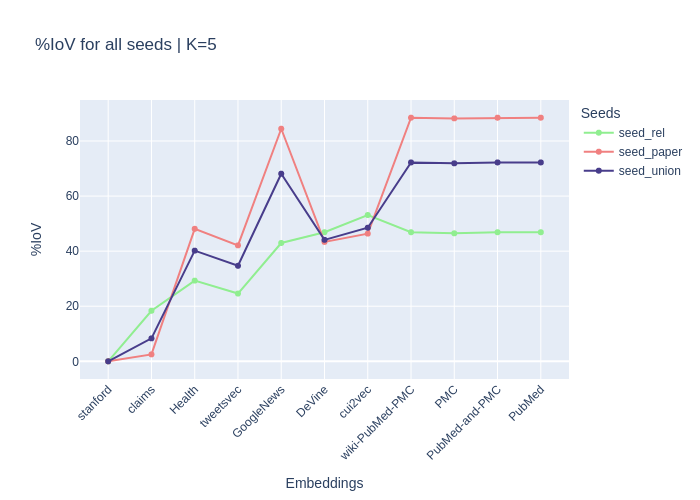

In [113]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Scatter(
        x=em,
        y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
        name=seed,
        marker_color=colors[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%IoV',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


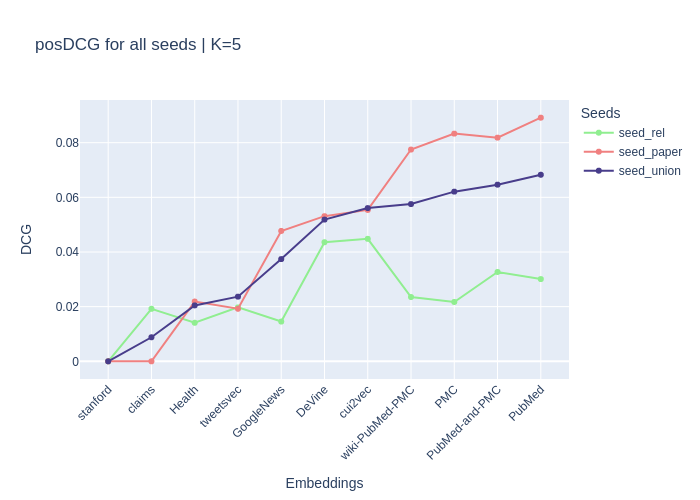

In [114]:
fig = go.Figure()

for i, seed in enumerate(seeds):
    fig.add_trace(go.Scatter(
        x=em,
        y=[big_g[emb][5][seed][0] for emb in embs],
        name=seed,
        marker_color=colors[i]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='DCG',
                  legend_title = 'Seeds',
                  xaxis_tickangle=-45)
fig.show(renderer="png")


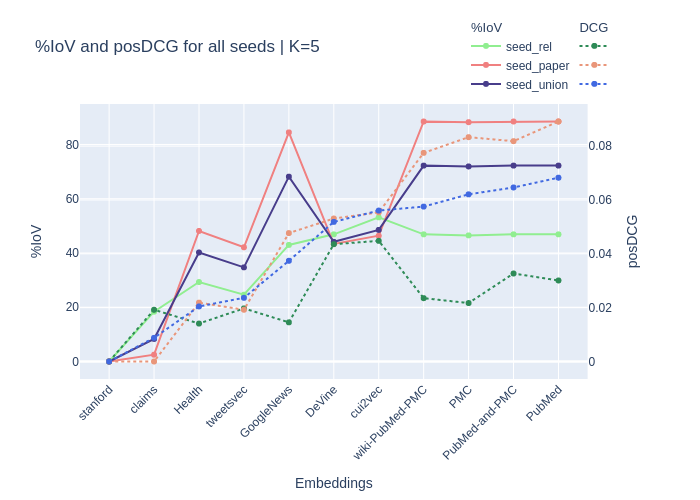

In [115]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%IoV"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][5][seed][3]/big_g[emb][5][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="DCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%IoV',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%IoV", secondary_y=False)
fig.update_yaxes(title_text="posDCG", secondary_y=True)
fig.show(renderer="png")



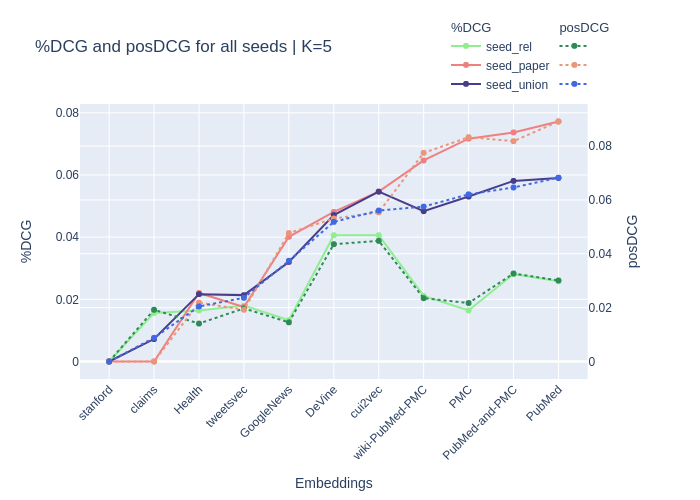

In [116]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%DCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][2] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            legendgrouptitle_text="posDCG",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name='',
            legendgroup="group2",
            line = dict(color=parallel_colors[i], dash='dot')),
                      secondary_y=True)        

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%DCG and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%DCG", secondary_y=False)
fig.update_yaxes(title_text="posDCG", secondary_y=True)
fig.show(renderer="png")



In [117]:
vemb_card = utils.inputs_load('Utilities/cardinality_vembs')

0:00:00


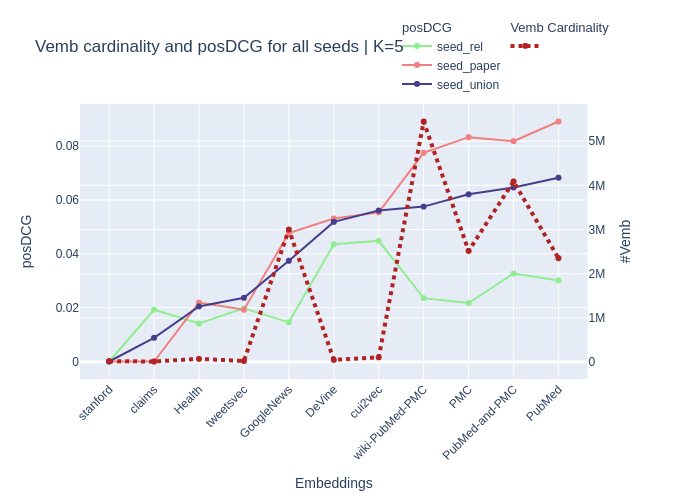

In [118]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="posDCG"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[big_g[emb][5][seed][0] for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
fig.add_trace(go.Scatter(
    x=em,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text="Vemb Cardinality",
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='Vemb cardinality and posDCG for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  #yaxis_title='%DCG',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="posDCG", secondary_y=False)
fig.update_yaxes(title_text="#Vemb", secondary_y=True)
fig.show(renderer="png")



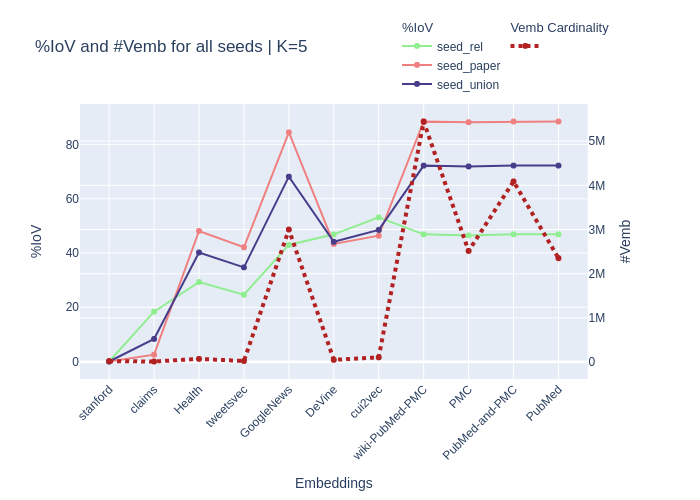

In [119]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
    
for i, seed in enumerate(seeds):
    if i==0:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
            legendgrouptitle_text="%IoV"
        ), secondary_y=False)
    else:
        fig.add_trace(go.Scatter(
            x=em,
            y=[(big_g[emb][k][seed][3]/big_g[emb][k][seed][5])*100 for emb in embs],
            name=seed,
            marker_color=colors[i],
            legendgroup="group",
        ), secondary_y=False)        
    
fig.add_trace(go.Scatter(
    x=em,
    y=[vemb_card[emb] for emb in embs],
    name='',
    legendgroup="group2",
    legendgrouptitle_text="Vemb Cardinality",
    line = dict(color='firebrick', width = 4, dash='dot')),
              secondary_y=True)     

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='%IoV and #Vemb for all seeds | K=' + str(k),
                  xaxis_title='Embeddings',
                  #yaxis_title='%IoV',
                  #legend_title = 'Seeds',
                  xaxis_tickangle=-45,
                 legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.update_yaxes(title_text="%IoV", secondary_y=False)
fig.update_yaxes(title_text="#Vemb", secondary_y=True)
fig.show(renderer="png")



In [47]:
colors_analog = ['gainsboro', 'purple', 'forestgreen', 'yellow', 'orange', 
                 'aqua', 'plum', 'tomato', 'lightslategray', 'orangered',
                 'yellowgreen', 'aliceblue', 'mediumvioletred', 'gold', 'sandybrown',
                 'aquamarine', 'black','lime', 'pink', 'limegreen', 'royalblue', 'blue']

In [48]:
tmp = utils.inputs_load('ANALOG_VARIABLE')
relas = list(tmp[embs[0]]['add'].keys())

0:00:01


In [69]:
opposite_relas = umls_tables_processing.OPPOSITE_RELAS

In [72]:
flattened_opposite = [i for o in opposite_relas for i in o]

In [70]:
relas_colors = {rela: color for rela, color in zip(relas, colors_analog)}

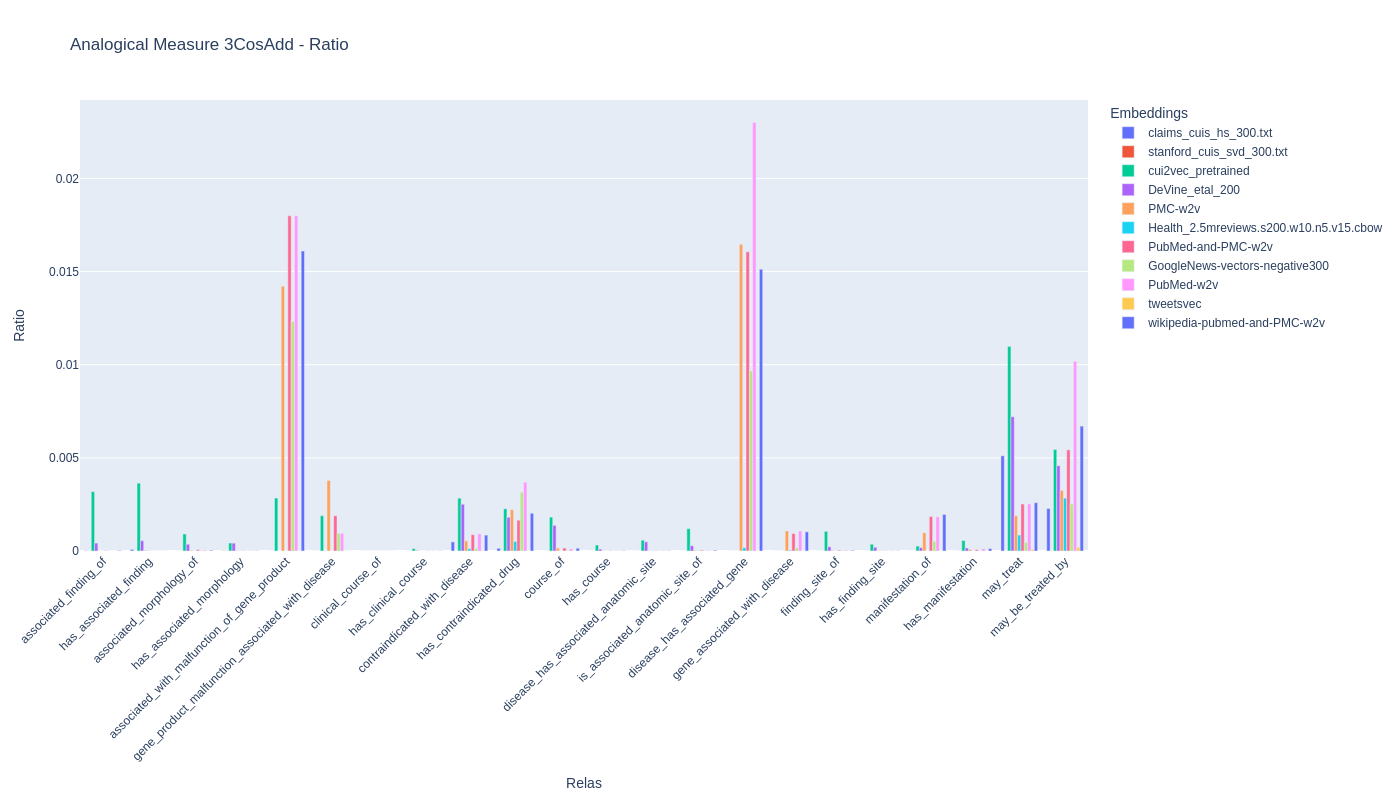

In [97]:
seed = seeds[2]# seed_union
fig = go.Figure()

for i,e in enumerate(embs):
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['ratio'] for r in flattened_opposite]#,
                                    #marker_color=q[i],
)) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

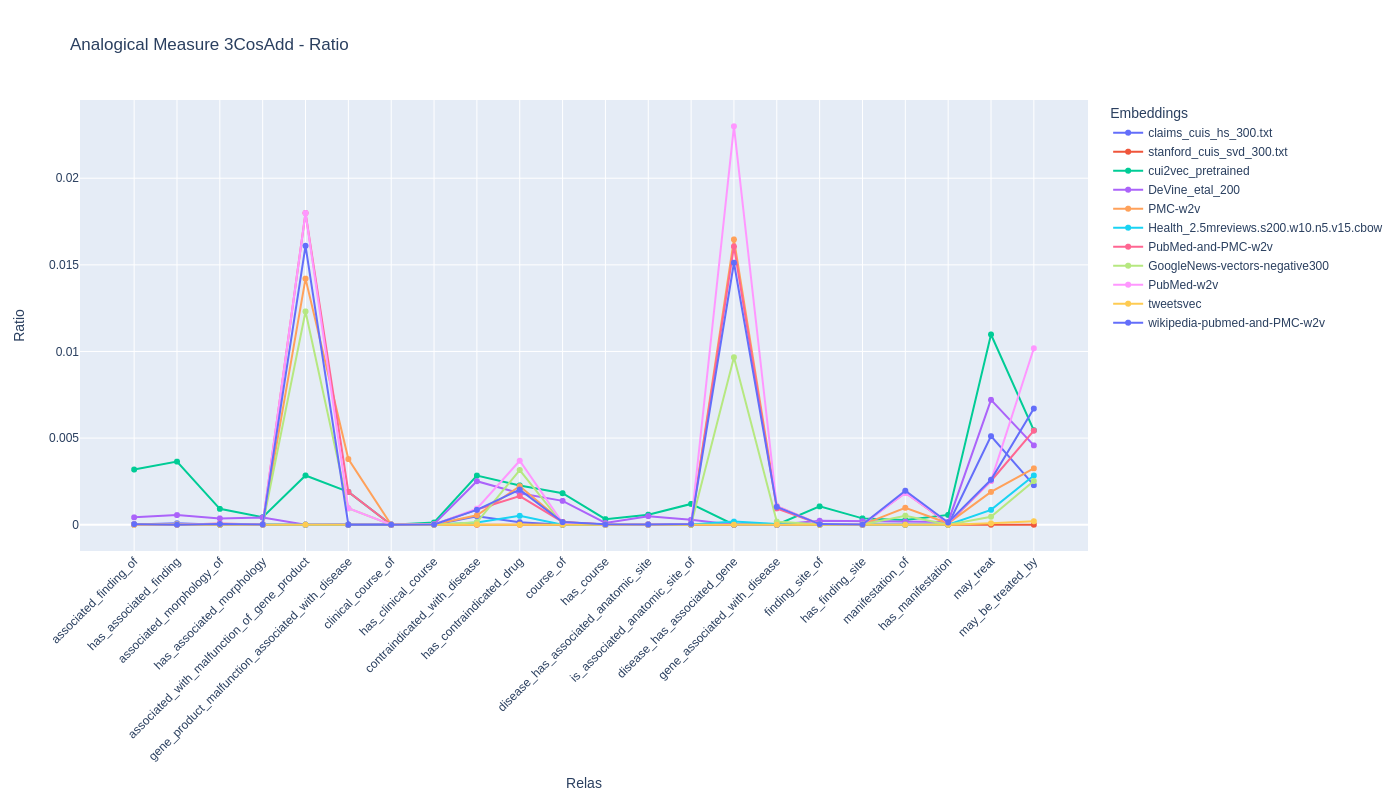

In [96]:
seed = seeds[2]# seed_union
fig = go.Figure()

for i, e in enumerate(embs):
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['ratio'] for r in flattened_opposite], 
                             #marker_color=q[i],
                             mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

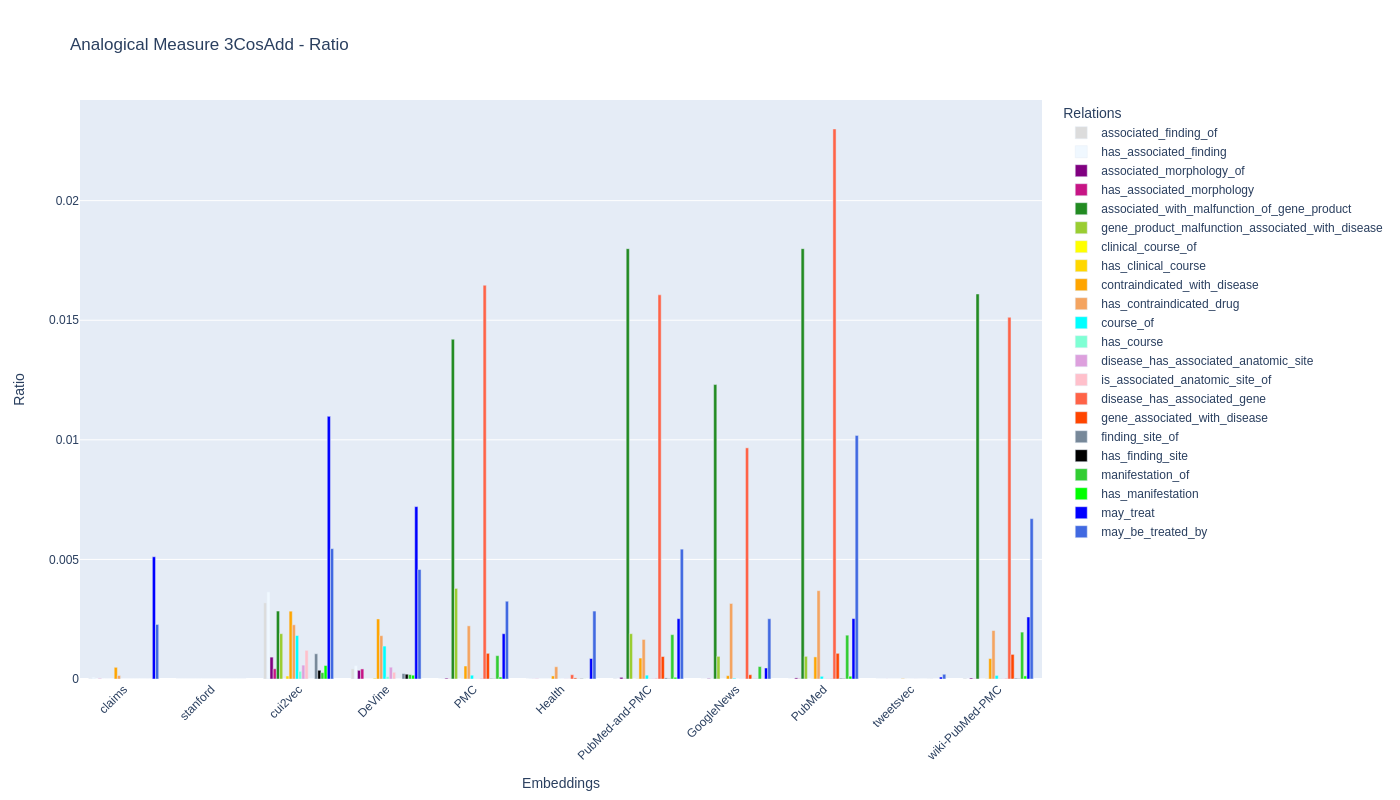

In [88]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[tmp[e]['add'][r]['ratio'] for e in embs], marker=dict(color = relas_colors[r]))
)#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

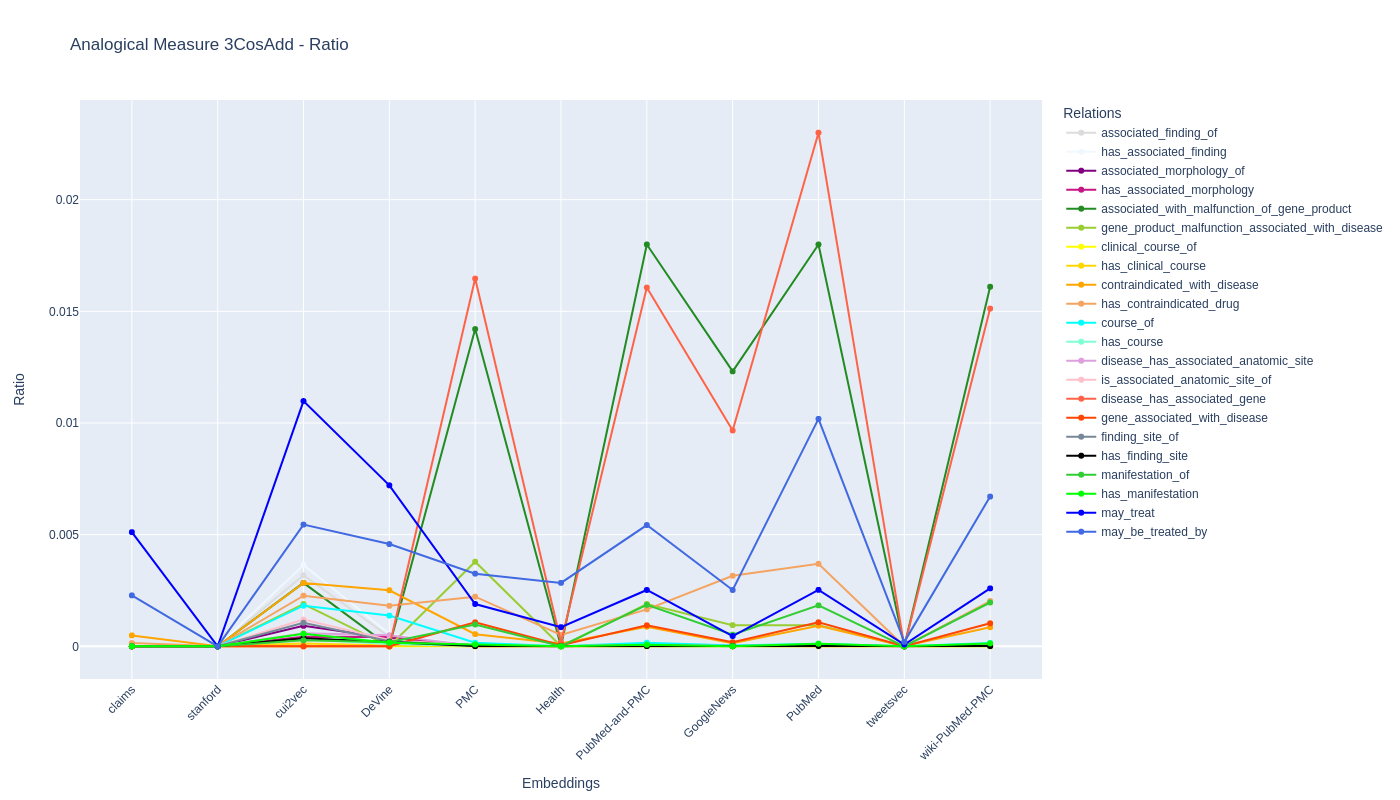

In [87]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Scatter(name=r, x=em, y=[tmp[e]['add'][r]['ratio'] for e in embs], mode = 'lines+markers', marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) )) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Ratio'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Ratio"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

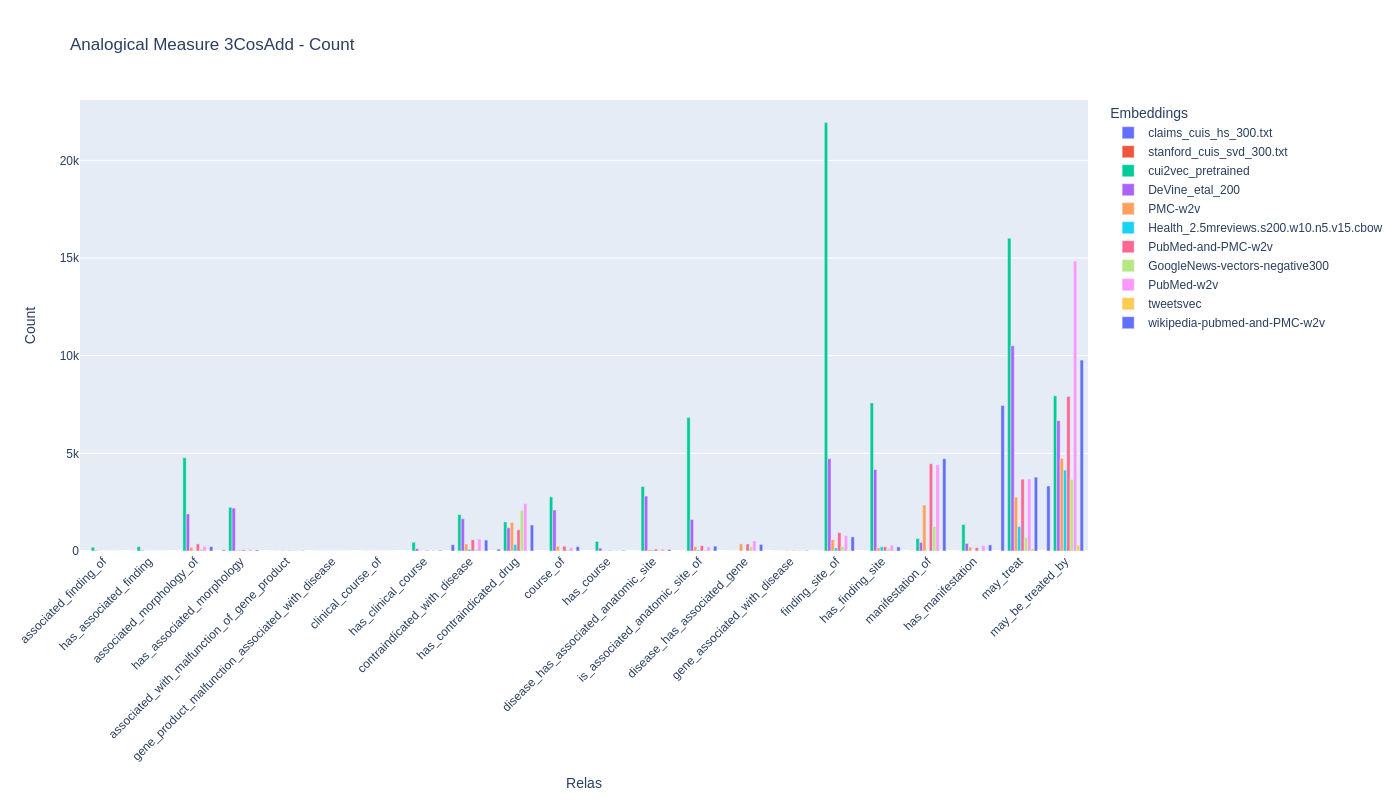

In [95]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['count'] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

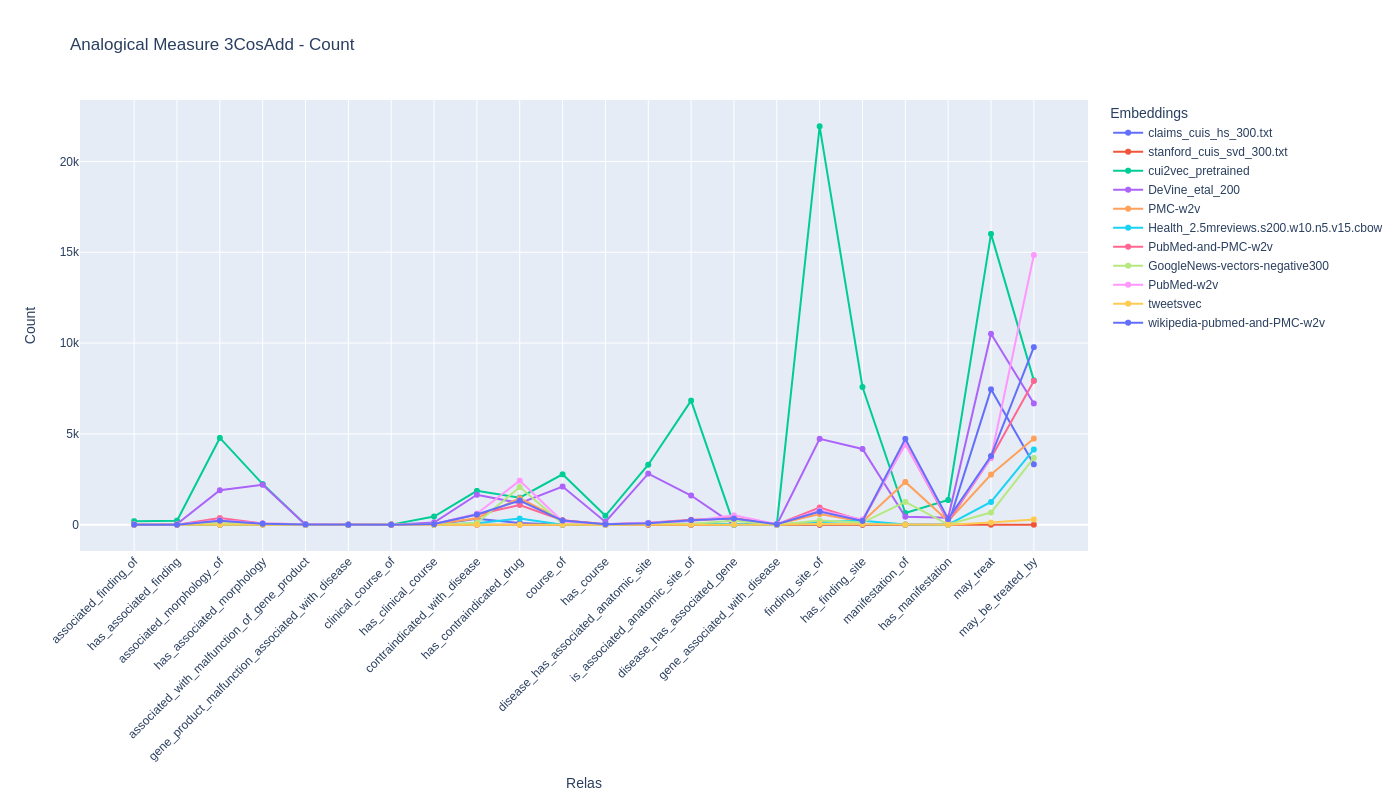

In [94]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['add'][r]['count'] for r in flattened_opposite], mode = 'lines+markers'
)) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

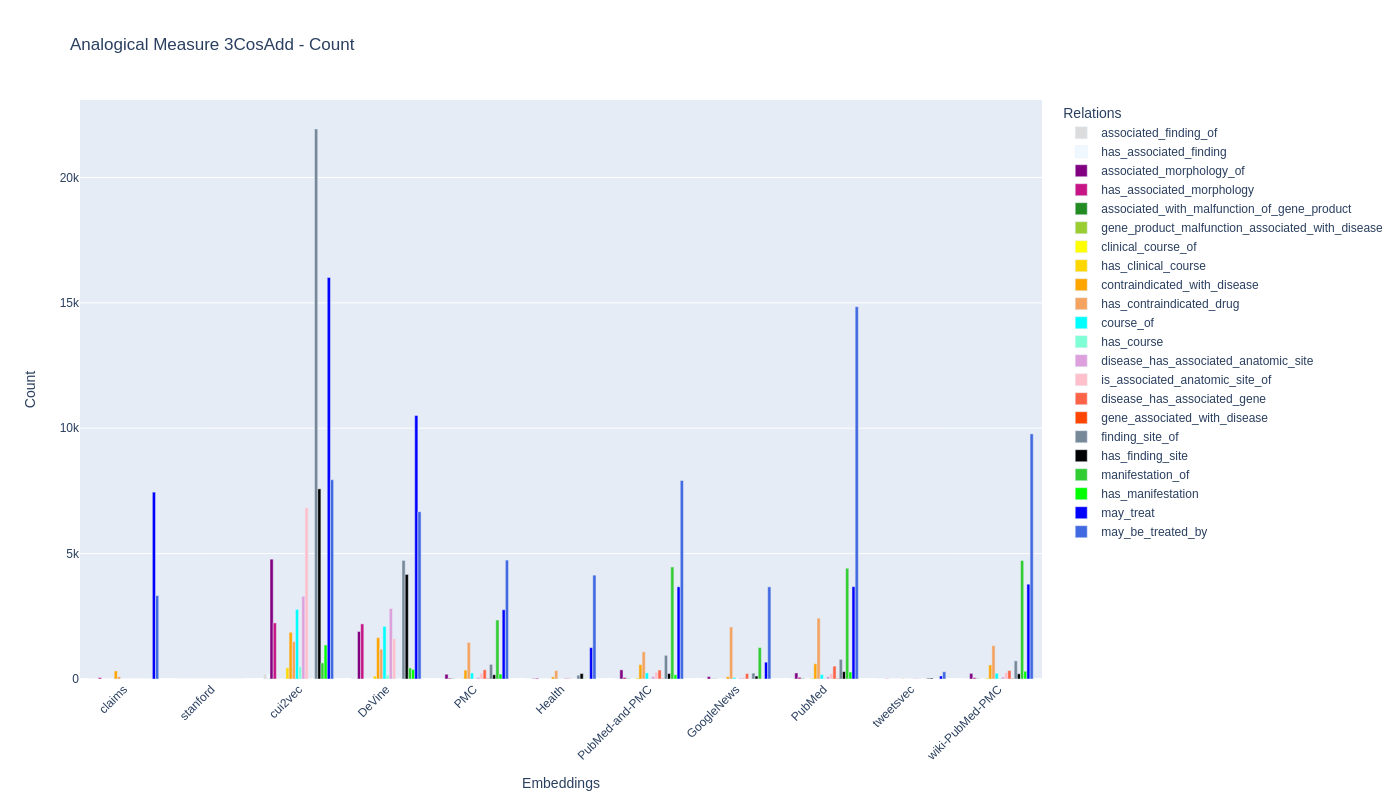

In [86]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[tmp[e]['add'][r]['count'] for e in embs], marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

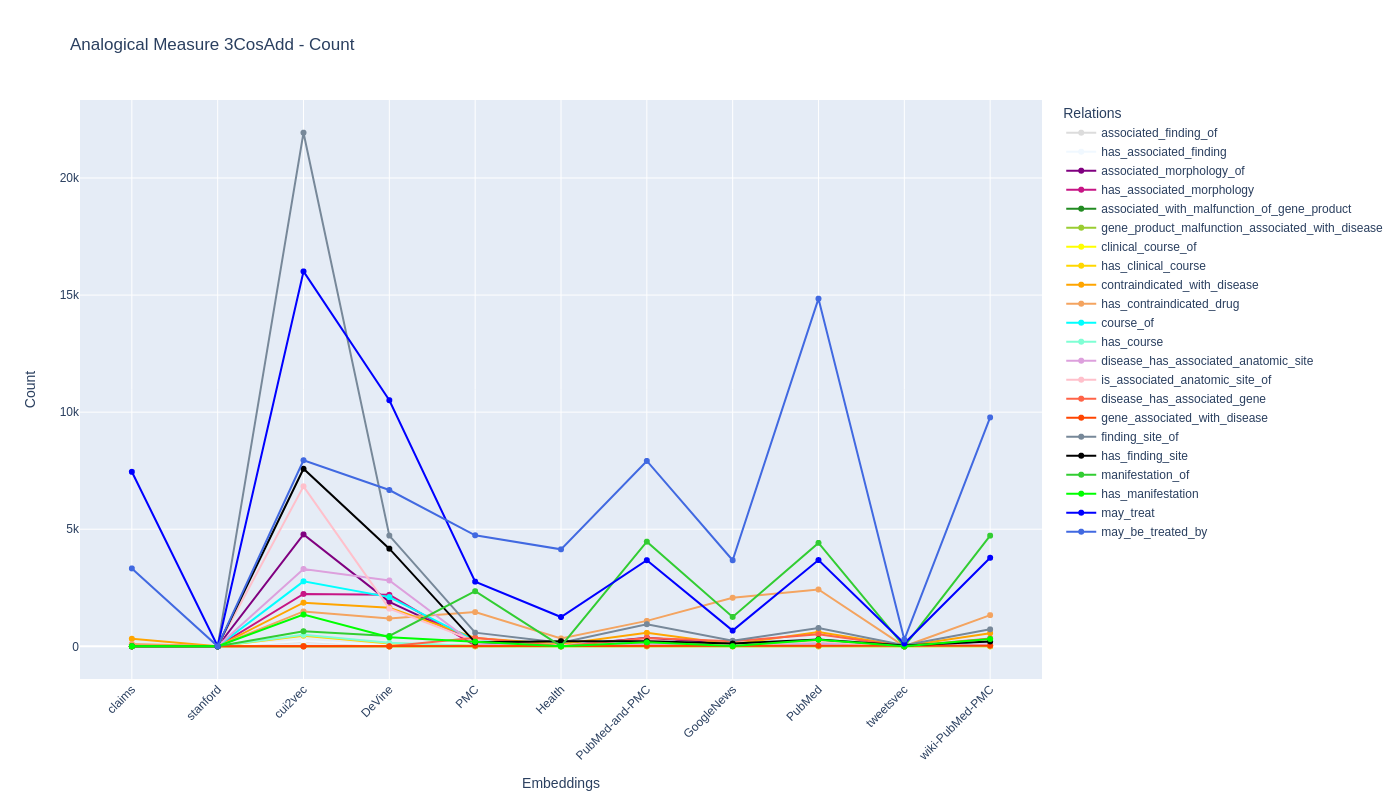

In [85]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Scatter(name=r, x=em, y=[tmp[e]['add'][r]['count'] for e in embs], marker=dict(color = relas_colors[r])))#, mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure 3CosAdd - Count'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relations',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Count"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

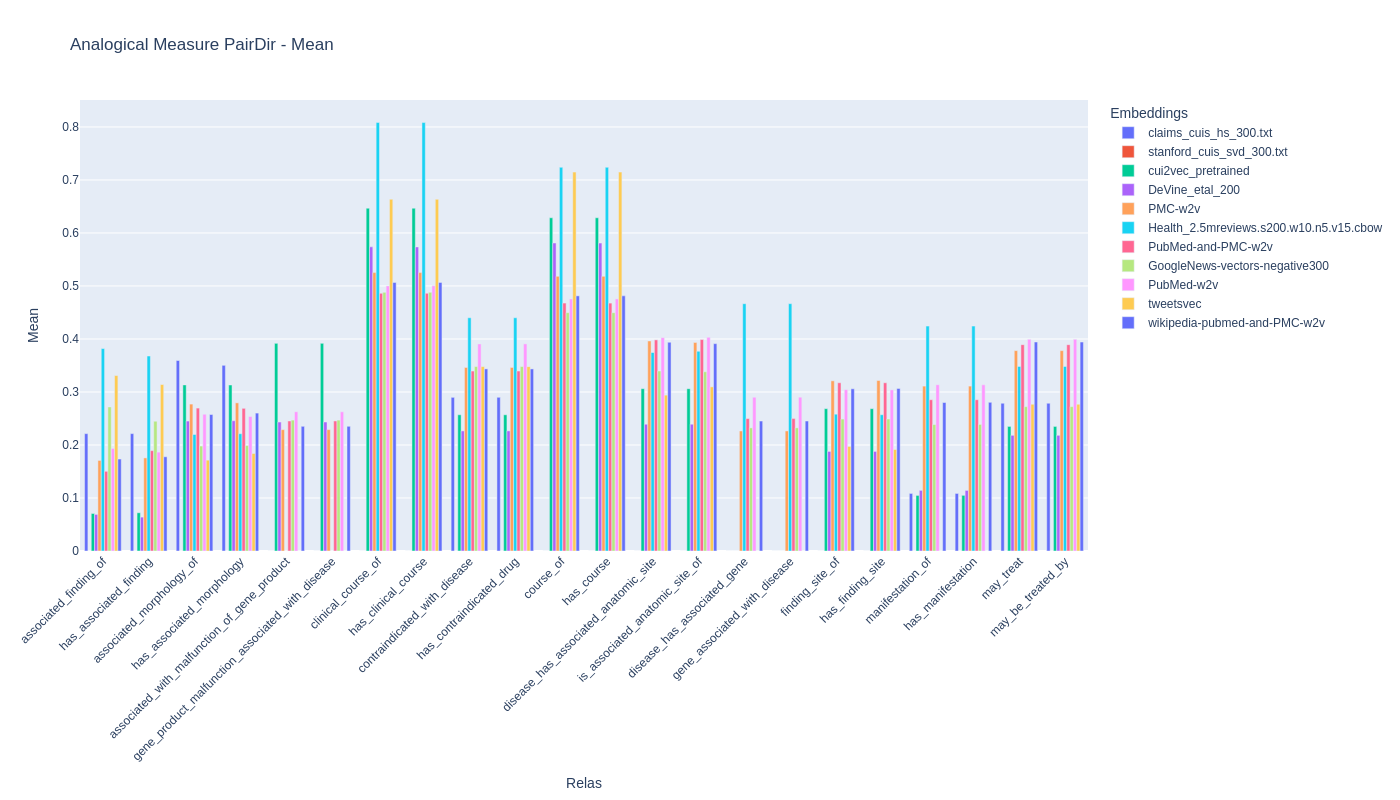

In [90]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[tmp[e]['pair'][r]['mean'] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure PairDir - Mean'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Mean"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

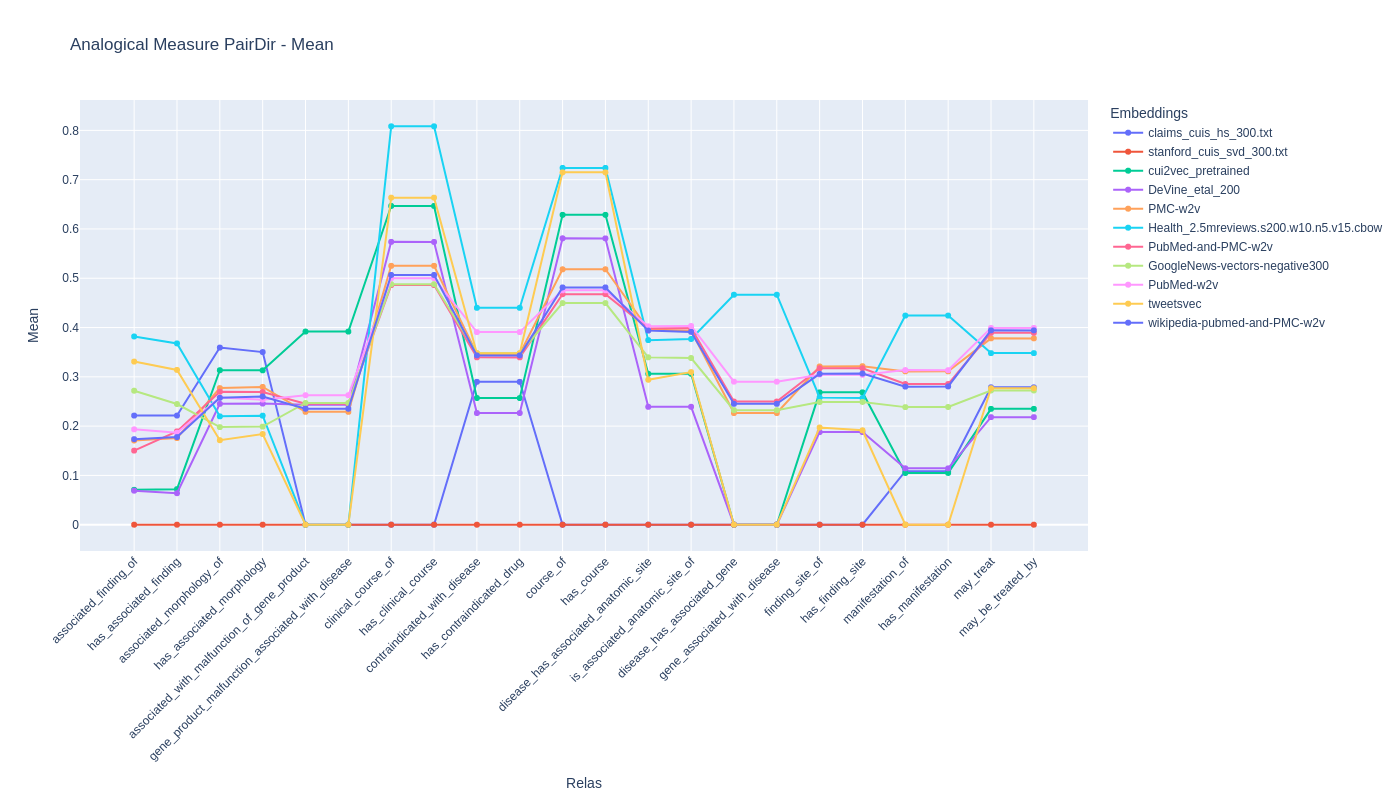

In [91]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Scatter(name=e, x=flattened_opposite, y=[tmp[e]['pair'][r]['mean'] for r in flattened_opposite], mode = 'lines+markers')) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Analogical Measure PairDir - Mean'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="Mean"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

In [60]:
card_k = utils.inputs_load('Utilities/AnalogicalData/k_cardinality_per_rel') 

0:00:00


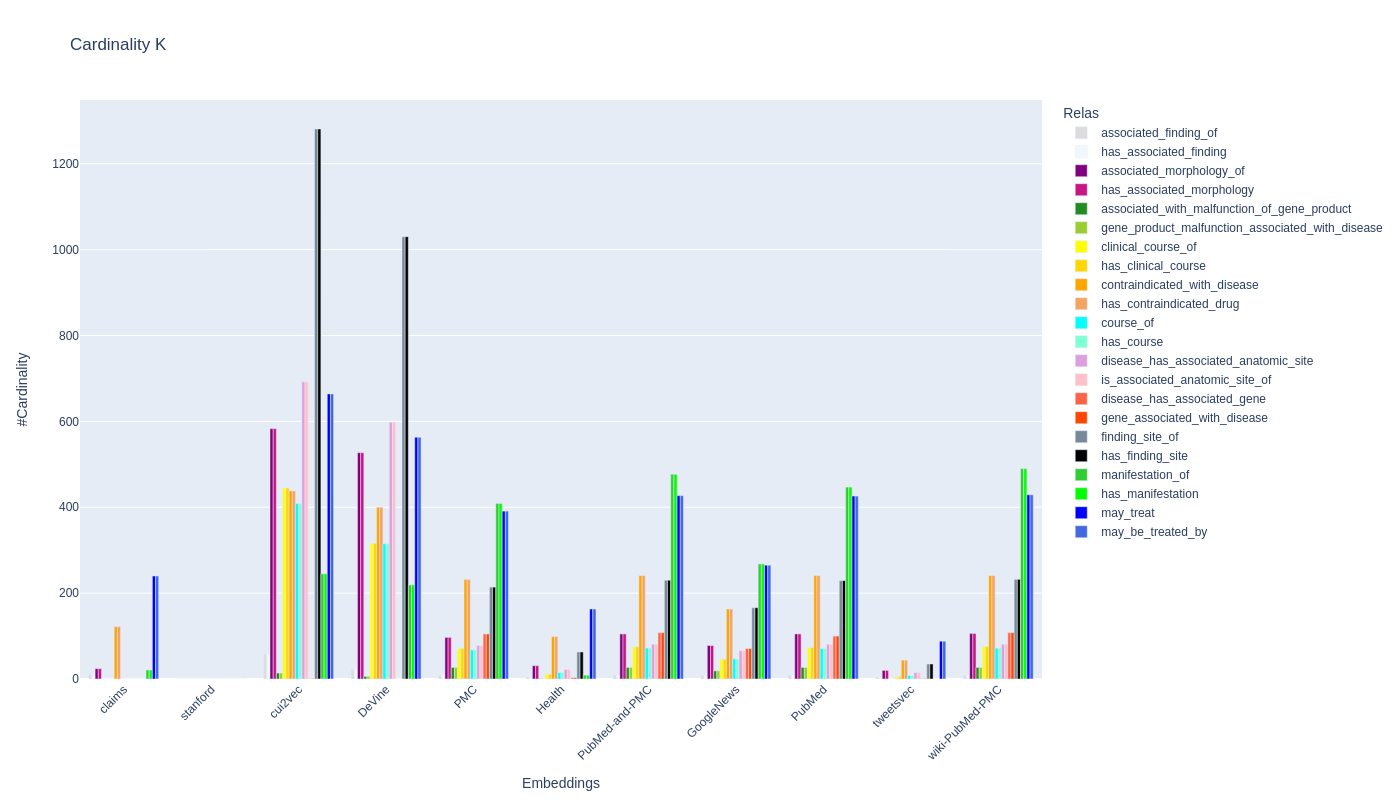

In [82]:
seed = seeds[2]# seed_union
fig = go.Figure()

for r in flattened_opposite:
    fig.add_trace(go.Bar(name=r, x=em, y=[card_k[r][e] for e in embs], marker=dict(color = relas_colors[r])))
    #fig.add_trace(go.Bar(name=r, x=em, y=[card_k[r][e] for e in embs], marker=dict(color = relas_colors[r])))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Cardinality K'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Relas',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="#Cardinality"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Embeddings"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")

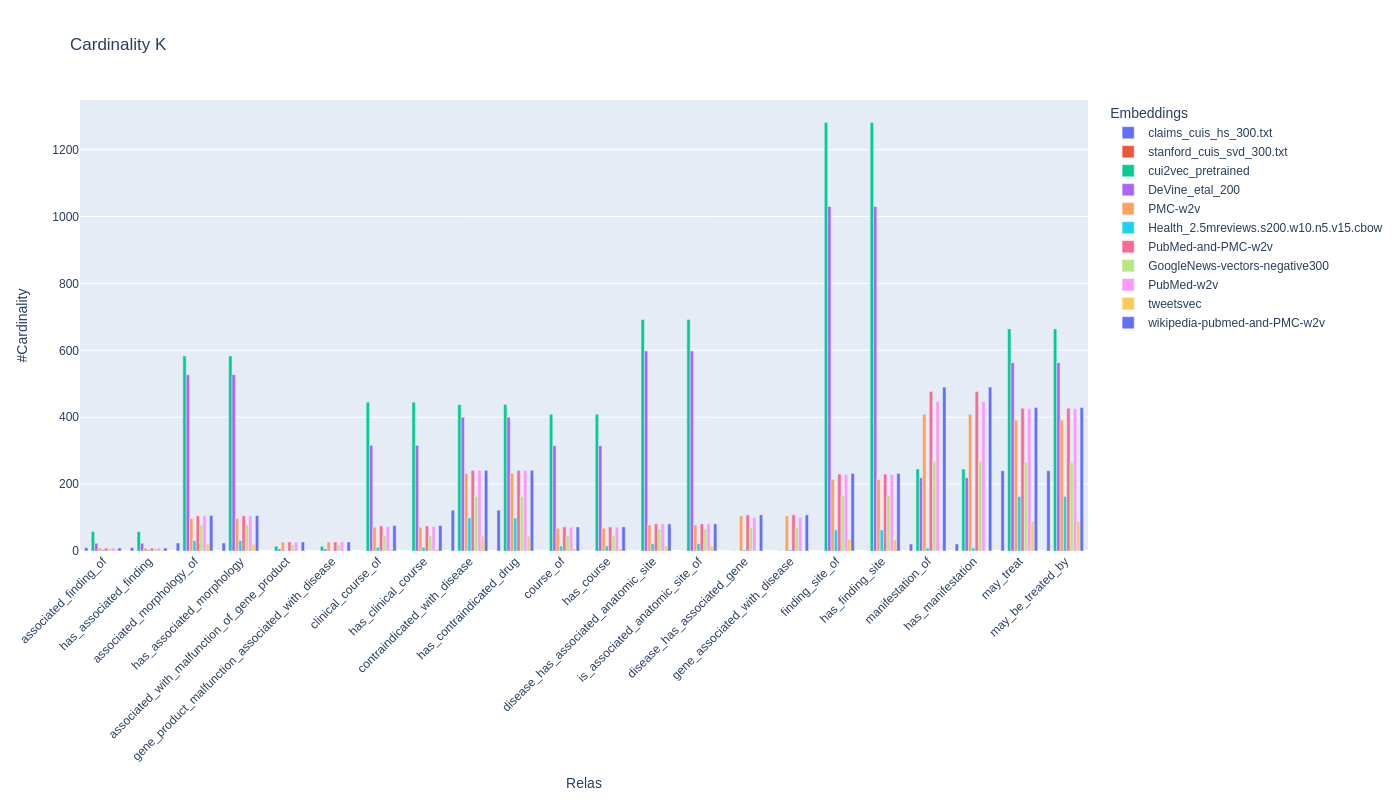

In [92]:
seed = seeds[2]# seed_union
fig = go.Figure()

for e in embs:
    fig.add_trace(go.Bar(name=e, x=flattened_opposite, y=[card_k[r][e] for r in flattened_opposite])) 

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title=dict(text='Cardinality K'#, 
                             #font=dict(size=50)
                            ),
                  barmode='group',
                  legend_title = 'Embeddings',
                  xaxis_tickangle=-45,
                  autosize=True,
                  width=1400,
                  height=800,
                  #font=dict(size=30),
                  yaxis=dict(
                      title_text="#Cardinality"#,
                      #titlefont=dict(size=50)
                  ),
                  xaxis=dict(
                      title_text="Relas"#,
                      #titlefont=dict(size=50)
                  ))
#fig.write_image("fig1.png")
fig.show(renderer="png")